# Macine Lerning Preprocessing

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 -Data Ingestion
reading the train data

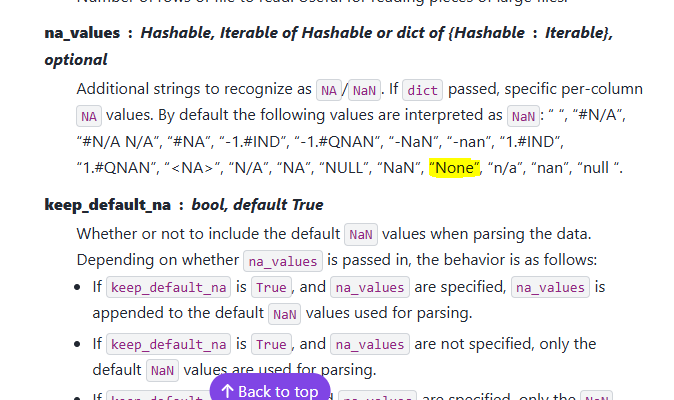

In [2]:
# apply this only for cars93 data
import pandas as pd
df = pd.read_csv("Cars93.csv", na_values=["", "NA"], keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Estimate weight of cars based on other paremeters
1. Target Feature - Weight
2. Weight - Remaining Features

### Step 2 - Perform Basic Data Quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [4]:
# Checking missing values in data
m = df.isna().sum()
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [5]:
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [6]:
# Check duplicates in dataframe
df.duplicated().sum()

np.int64(0)

In [7]:
# If duplicates values are present use below code
df = df.drop_duplicates(keep="first").reset_index(drop=True)

### Step 3 -Separate X and Y(Weight)
Columns like id which just contain serial number are consider Statistically insignificant

In [8]:
X = df.drop(columns=["id", "Weight"])
Y = df[["Weight"]]

In [9]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [10]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### Replacing Missing Values
1. Categorical (Text)- Mode (Most frequently occuring)
2. Continuous(Numbers) - Mean or Median

In [11]:
df["AirBags"].value_counts()

AirBags
Driver only           42
None                  33
Driver & Passenger    14
Name: count, dtype: int64

In [12]:
df["AirBags"].mode()

0    Driver only
Name: AirBags, dtype: object

In [13]:
type(df["AirBags"].mode())

pandas.core.series.Series

In [14]:
# Calculating Mode Value
df["AirBags"].mode()[0]

'Driver only'

In [15]:
# Calculating mean value
df["Luggage.room"].mean()

np.float64(13.890243902439025)

In [16]:
# Calculating median value
df["Luggage.room"].median()

np.float64(14.0)

### Function in pandas to replace missing values fillna()
df.fillna(value)

In [17]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [18]:
mode = df["AirBags"].mode()[0]
mode

'Driver only'

In [19]:
df["AirBags"] = df["AirBags"].fillna(mode)

In [20]:
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [21]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

### Separating Categorical and continuous feature

In [22]:
X.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Origin', 'Make'],
      dtype='object')

In [23]:
X.dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Origin                 object
Make                   object
dtype: object

In [24]:
cat = list(X.columns[X.dtypes == "object"])
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [25]:
con = list(X.columns[X.dtypes != "object"])
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [26]:
# Applying for loop an dataframe columns
for i in X.columns:
    print(i)

Manufacturer
Model
Type
Min.Price
Price
Max.Price
MPG.city
MPG.highway
AirBags
DriveTrain
Cylinders
EngineSize
Horsepower
RPM
Rev.per.mile
Man.trans.avail
Fuel.tank.capacity
Passengers
Length
Wheelbase
Width
Turn.circle
Rear.seat.room
Luggage.room
Origin
Make


In [27]:
def replacer(df: pd.DataFrame):
    # Separate categorical features
    cat = list(df.columns[df.dtypes == "object"])
    # apply for loop on columns
    for i in df.columns:
        if i in cat:
            mode = df[i].mode()[0]
            df[i] = df[i].fillna(mode)
        else:
            mean = df[i].mean()
            df[i] = df[i].fillna(mean)
        
        

In [28]:
X.isna().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Origin                 0
Make                   0
dtype: int64

In [29]:
# Clean the data by calling replacer function
replacer(X)

In [30]:
X.isna().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Origin                0
Make                  0
dtype: int64

In [31]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


### One Hot Encoding on Categorical features

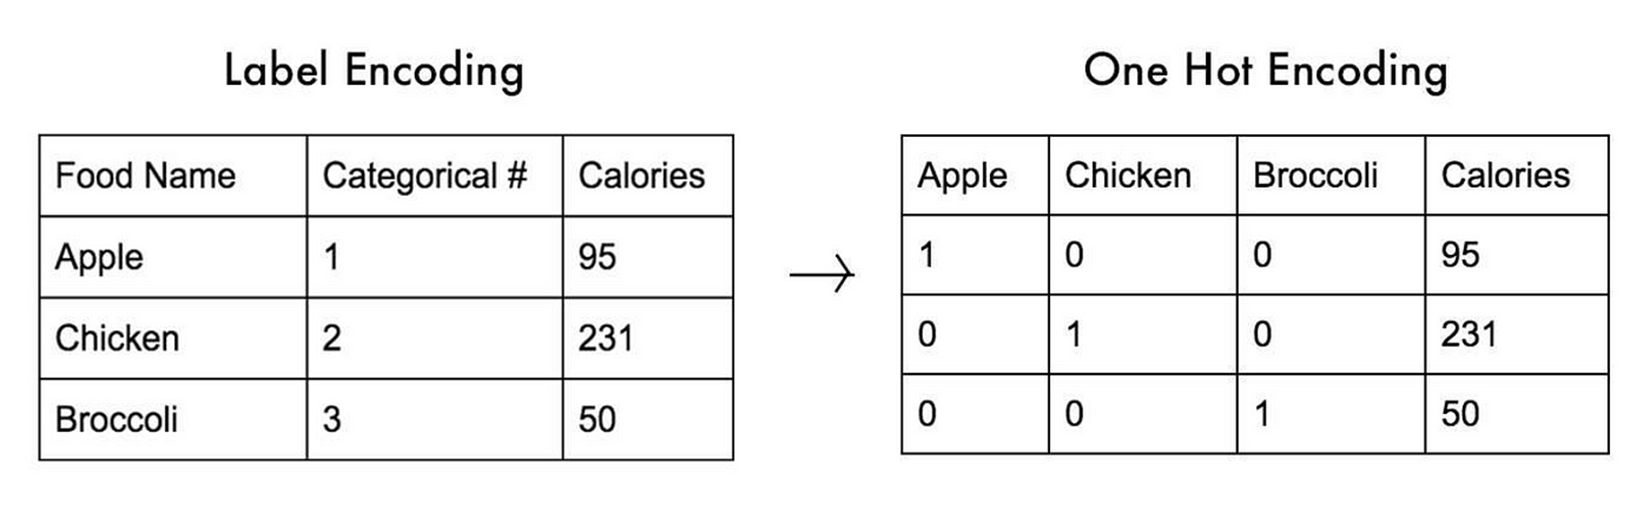

In [32]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [33]:
X_cat = X[cat]
X_cat

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Acura,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Acura Legend
2,Audi,90,Compact,Driver only,Front,6,Yes,non-USA,Audi 90
3,Audi,100,Midsize,Driver only,Front,6,Yes,non-USA,Audi 100
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,None,Front,5,Yes,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,None,Front,4,Yes,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,None,Front,6,Yes,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,Driver only,Rear,4,Yes,non-USA,Volvo 240


In [34]:
X_cat["Cylinders"].unique()

array(['4', '6', '8', '3', 'rotary', '5'], dtype=object)

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False,
    drop="first").set_output(transform="pandas")
X_cat_pre = ohe.fit_transform(X_cat)
X_cat_pre


,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Scale the Continuous data

In [37]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [38]:
X_con = X[con]
X_con

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.000000
1,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.000000
2,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.000000
3,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.000000
4,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17,21,2.5,109,4500,2915,21.1,7,187,115,72,38,34.0,13.890244
89,17.6,20.0,22.4,21,30,2.0,134,5800,2685,18.5,5,180,103,67,35,31.5,14.000000
90,22.9,23.3,23.7,18,25,2.8,178,5800,2385,18.5,4,159,97,66,36,26.0,15.000000
91,21.8,22.7,23.5,21,28,2.3,114,5400,2215,15.8,5,190,104,67,37,29.5,14.000000


### Aplly standard scaler on X

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
X_con_pre = scaler.fit_transform(X_con)
X_con_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186


### Combine Categorical and continuous preprocessed dat

In [40]:
X_pre = X_con_pre.join(X_cat_pre)
X_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Processing Complete

### Train and Test split

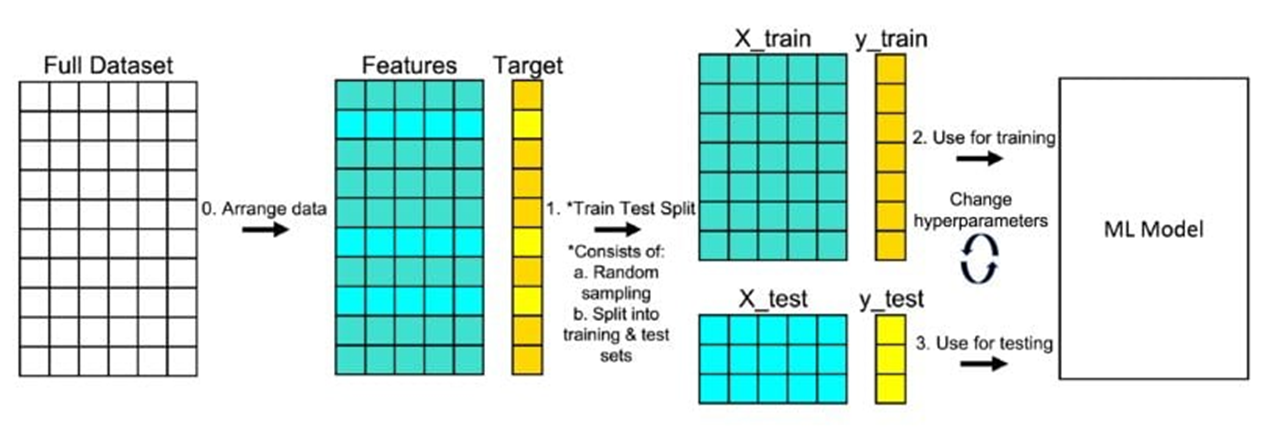
Test can be 20% to 30% of total data

In [41]:
X_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)


In [45]:
xtrain.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
57,1.365026,1.289670,1.185041,-0.423219,-0.016221,-0.356418,-0.265452,-0.304365,0.187910,-0.663618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,-1.003095,-0.979424,-0.911397,0.113500,0.172352,-0.841022,-0.323043,2.054464,0.157535,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.606307,0.685966,0.729294,-0.781032,-0.959087,0.322027,1.116716,1.212025,-0.247462,0.716035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.043016,-0.021825,-0.063707,-0.423219,-0.204794,0.806631,1.347077,0.875050,-0.713210,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,1.985795,1.726835,1.449374,-0.781032,-0.581941,1.872759,1.270290,-1.146804,-0.996708,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [47]:
xtest.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
23,-1.003095,-0.854520,-0.701753,0.113500,-0.016221,-0.453339,-0.975733,-0.809828,0.532158,-0.816912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.203957,0.332071,0.428500,-0.781032,-1.336233,-0.259498,-0.111878,-0.472853,0.370159,0.961306,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21,1.422504,1.039862,0.692834,-0.423219,-0.581941,0.612789,0.060893,-0.809828,-1.108083,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.100495,-0.073868,-0.209546,-0.959938,-0.581941,2.260442,0.502419,-1.820755,-1.988953,1.942392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


In [49]:
xtrain.shape

(74, 248)

In [50]:
xtest.shape

(19, 248)

### Model Training
in model training pass only xtrain and ytrain

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [52]:
model.intercept_

array([3072.33328971])

In [53]:
model.coef_





array([[-6.78923232e-01,  6.18054454e-01,  1.85095772e+00,
        -3.03333454e+01, -7.13167575e+01,  6.84989616e+01,
         8.61703157e+01, -2.04506502e+01, -7.29590328e-01,
         3.81722886e+01,  4.50109389e+01,  5.92246189e+01,
         1.56863020e+02,  7.44631957e+01,  2.07848707e-02,
        -2.48575112e+01,  1.05614335e+01,  6.97846324e+01,
         7.70080863e+01, -5.01632000e+01, -4.70248613e+01,
        -2.07738639e+01, -1.63424829e-13,  1.88092960e+01,
         7.23681749e+00, -4.07039682e+01, -1.40350025e+01,
        -1.51066325e-01,  1.78405110e+01, -1.18940725e+01,
        -9.42764449e+00,  2.49692250e+01,  2.89362331e+01,
        -1.94152351e+01, -5.19310644e+01, -1.05782043e+00,
         6.95036881e+00,  4.49280859e+01, -2.88825193e+01,
         4.14522935e+01,  9.01240183e+00, -6.15124522e+01,
        -7.08050740e+00,  4.07690650e+01, -2.48689958e-14,
        -1.74725065e+01,  3.10141871e+01, -4.71445369e+00,
        -3.12608041e+01, -1.42108547e-14, -2.06702603e+0

### Model Evaluation

In [54]:
# R2 score in train
model.score(xtrain, ytrain)

1.0

In [55]:
#R2 score in test
model.score(xtest, ytest)

0.9337479210296901

### R2 score is greater than 0.8 in both train and test hence model is good

In [58]:
from sklearn.metrics import(    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [57]:
def evaluate_model(model, x, y):
    # Predict the results on x
    ypred = model.predict(x)
    # Calulate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")


In [59]:
print("Train Result :")
evaluate_model(model, xtrain, ytrain)

Train Result :
RMSE : 0.00
MAE : 0.00
MAPE : 0.00%
R2 : 100.00%


In [60]:
ypred_train = model.predict(xtrain)
ypred_train[0:5]

array([[2920.],
       [2530.],
       [3730.],
       [3490.],
       [4055.]])

In [61]:
ytrain[0:5]

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [62]:
print("Test Results :")
evaluate_model(model, xtest, ytest)

Test Results :
RMSE : 155.01
MAE : 116.37
MAPE : 3.68%
R2 : 93.37%


In [63]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array([[2577.37198506],
       [3616.15191496],
       [3030.5491714 ],
       [3345.54594115],
       [3973.12152782]])

In [65]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


### Above model is a Generalized model because R2 score>0.8 in both train and test

### Above model is good

In [67]:
xnew = pd.read_csv("sample.csv", na_values=["", "NA"], keep_default_na=False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [68]:
xnew.isna().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               1
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        1
Luggage.room          1
Origin                0
Make                  0
dtype: int64

In [69]:
# Replace the missing values
replacer(xnew)

In [70]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,None,Front,...,15.0,6,190,106,65,37,31.000,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.000,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.500,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,27.625,14.0,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.000,10.0,non-USA,Volkswagen Fox


In [71]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [72]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [73]:
xnew_cat =xnew[cat]
xnew_con =xnew[con]

In [74]:
xnew_cat

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Audi,100,Midsize,None,Front,6,Yes,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,None,Front,4,Yes,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,None,Front,4,No,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,Driver only,Rear,rotary,Yes,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,None,Front,4,Yes,non-USA,Volkswagen Fox


In [75]:
xnew_con

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,30.8,37.7,44.6,19,26,2.8,172,5500,2535,15.0,6,190,106,65,37,31.000,17.0
1,9.4,11.1,12.8,23,31,2.0,110,5200,2665,15.2,5,181,101,66,39,25.000,13.0
2,13.4,15.9,18.4,21,29,2.2,110,5200,2595,16.5,6,198,108,71,40,28.500,16.0
3,32.5,32.5,32.5,17,25,1.3,255,6500,2325,20.0,2,169,96,69,37,27.625,14.0
4,8.7,9.1,9.5,25,33,1.8,81,5500,2550,12.4,4,163,93,63,34,26.000,10.0


In [76]:
ohe

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [77]:
scaler

StandardScaler()

In [78]:
# apply one hot encoding on categorical columns
xnew_cat_pre = ohe.transform(xnew_cat)
xnew_cat_pre

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
# apply standard scaler on continious features
xnew_con_pre = scaler.transform(xnew_con)
xnew_con_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.078172,1.111472
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.962320,-0.318186
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.227967,0.754057
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.069605,0.039228
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.622238,-1.390430


In [80]:
xnew_pre = xnew_con_pre.join(xnew_cat_pre)
xnew_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [81]:
preds = model.predict(xnew_pre)
preds

array([[3310.22964226],
       [2575.        ],
       [3195.        ],
       [2897.14450833],
       [2240.        ]])

### Saving above results in csv file

In [82]:
xnew["Weight_pred"] = preds

In [83]:
xnew = xnew.round(2)

In [84]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,None,Front,...,6,190,106,65,37,31.00,17.0,non-USA,Audi 100,3310.23
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.00,13.0,USA,Pontiac Sunbird,2575.00
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.50,16.0,USA,Chevrolet Lumina,3195.00
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,27.62,14.0,non-USA,Mazda RX-7,2897.14
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.00,10.0,non-USA,Volkswagen Fox,2240.00


In [85]:
xnew.to_csv("Results.csv", index=False)